# Introduction

There 3 dataset:

* df1, dataset with data from patients without diabetes, pre-diabetes and diabetes
* df2, balanced patients with and without diabetes ==> using for model training and prediction
* df3, imbalanced dataset of patients with and without diabetes ==> using for Data Analysis

This analysis will work with the last 2, where we will explore df3 imbalanced and large dataset to understand the features and target relationship. We will use this information to predict patients in balanced dataset df2.

Important risk factors for diabetes :

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )

About Columns :
Diabetes_binary : you have diabetes (0,1)

HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

CholCheck : Cholesterol check within past five years (0,1)

BMI : Body Mass Index (BMI)

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

Fruits : Consume Fruit 1 or more times per day (0,1)

Veggies : Consume Vegetables 1 or more times per day (0,1)

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
%config InlineBackend.figure_formats = 'svg'

warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes_012_health_indicators_BRFSS2015.csv


# Data Analysis
**Using imbalanced dataset of patients with and without diabetes**

In [3]:
df = pd.read_csv('/kaggle/input/diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

As we can clearly see, the data contains some duplicate values. These duplicate values must be dealt with before we can proceed with any analysis. Additionally, the data only contains integer values, so we need to convert the data into integers before we can perform any calculations.

In [5]:
df = df.astype(int)

In [6]:
df.duplicated().sum()
# approx 4.6% data is duplicate .

24206

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.isnull().sum().sum()
# data doesn't contain any missing value

0

In [9]:
unique_value_count = {}

for i in df.columns:
    unique_value_count[i] =  df[i].nunique()

pd.DataFrame(unique_value_count , index=['unique value count']).T

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


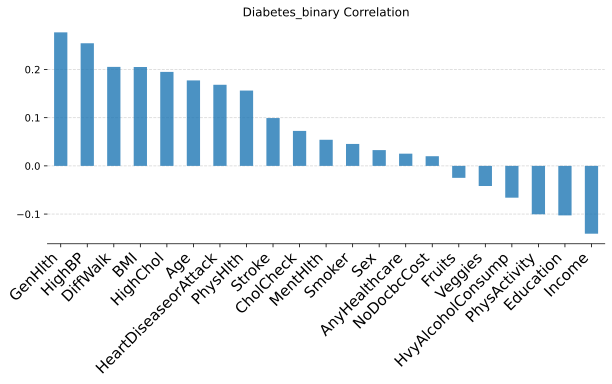

In [10]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(10, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

there are some outlier in BMI , Mental_Health and physical_health .  But it follow gaussian distribution and logically we expect such value in real life.

That's why we consider there are no outliers

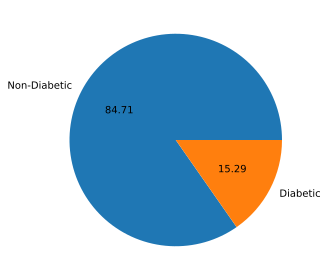

In [11]:
plt.pie(x= df.Diabetes_binary.value_counts() , labels=['Non-Diabetic' , 'Diabetic'] , autopct='%.02f');

**Result : The number of Non-Diabetic person is greater than Diabetic person in our dataset which follows real world trend.**

## Relation between Diabetes with major features.
**Like : HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , GenHlth , PhysHlth , Age , Education , Income , DiffWalk and etc ..**

In [12]:
def visualize_feature(feature_name, df):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots
    
    # Pie chart
    df[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')
    
    # Crosstab heatmap
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes_binary'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_binary (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_binary')
    
    plt.tight_layout()
    plt.show()


### GENERAL FEATURES
**HighBP , HighChol , BMI , smoker , HvyAlcoholConsump**

#### Relation With HighBP
**Column info :**
****
HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

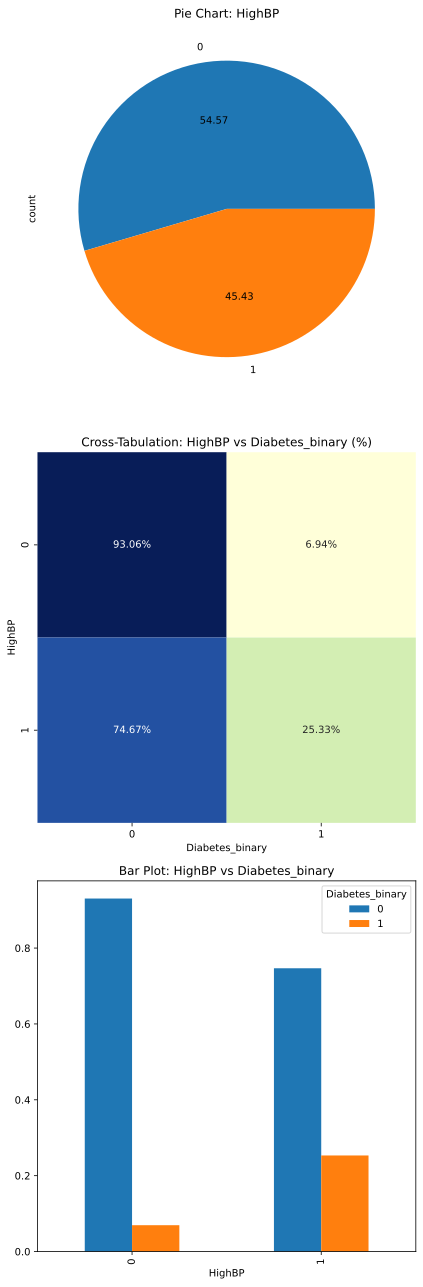

In [13]:
visualize_feature('HighBP' , df)

**Result : People with no high blood pressure are at a lower risk of developing diabetes than people with high blood pressure.**

* Approximately 93% of people without high blood pressure are safe from diabetes.
* In contrast, only 74.6% of people with high blood pressure are safe from diabetes.
* **The higher the blood pressure, the greater the risk of developing diabetes**

#### Relation with HighChol
**Column info :**
****
HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

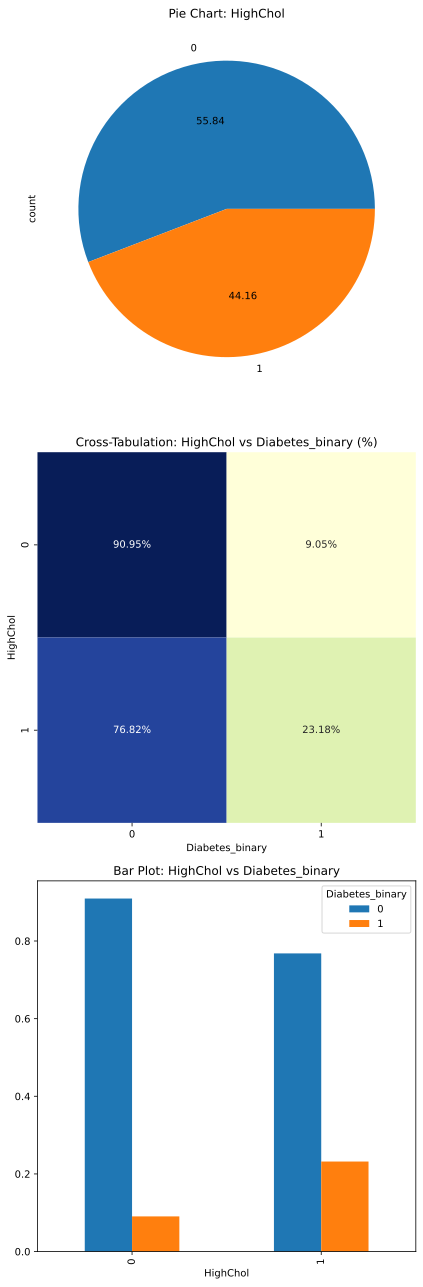

In [14]:
visualize_feature('HighChol' ,df)

**Result : People with high cholesterol are at a higher risk of developing diabetes than people with low cholesterol.**

#### combine effect of HighChol and HighBP with Diabetes

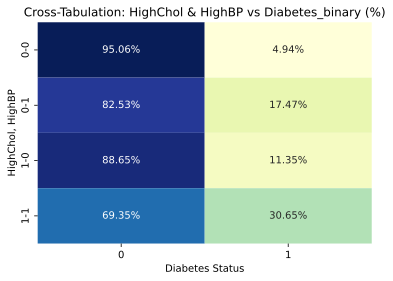

In [15]:
cross_tab = pd.crosstab([df.HighChol, df.HighBP], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HighChol, HighBP")
plt.title("Cross-Tabulation: HighChol & HighBP vs Diabetes_binary (%)")
plt.show()


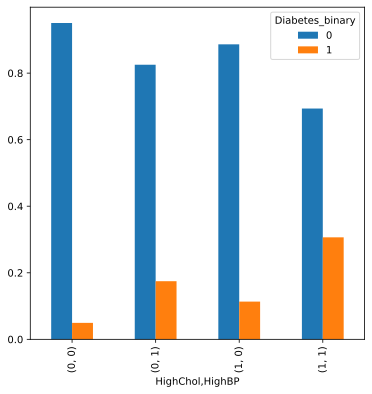

In [16]:
cross_tab.plot(kind = 'bar' , figsize = (6,6));

**Result :  The combination of high cholesterol and high blood pressure (hypertension) is a more lethal risk factor for diabetes than either condition alone.**

#### Relation with BMI
**Column info :**
****
BMI : Body Mass Index (BMI)

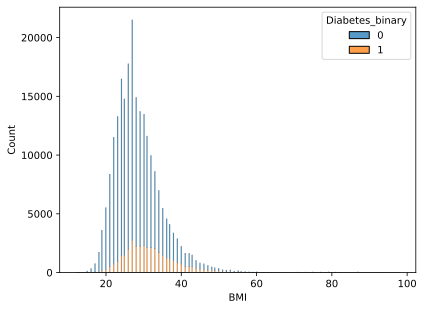

In [17]:
sns.histplot(df , x= df.BMI,hue=df.Diabetes_binary ,multiple='stack' );

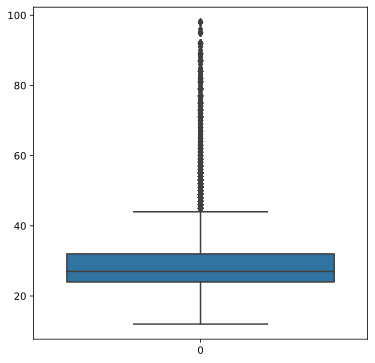

In [18]:
plt.figure(figsize = (6,6))
sns.boxplot(df.BMI);

**Result : The number of diabetes cases is highest in the BMI range of 20-50, but this is also the range with the most data points.**

* This means that the relationship between BMI and diabetes is not clear-cut.

* It is possible that the higher number of diabetes cases in this range is simply due to the fact that there are more people in this range.

* However, it is also possible that there is a real relationship between BMI and diabetes in this range.

#### Relation with Smoker
**Column info :**
****
Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

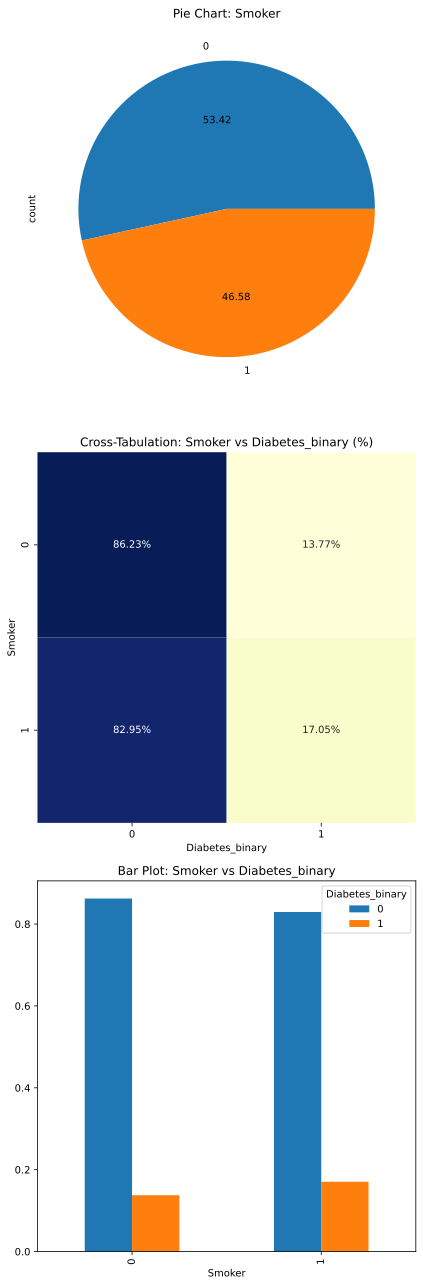

In [19]:
visualize_feature('Smoker' , df)

**Result : Acording to this data, Only smoking has a minor effect on diabetes.**

#### Combine effect of Smoker and HvyAlcoholConsump with Diabetes
**Column info :**
****
HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

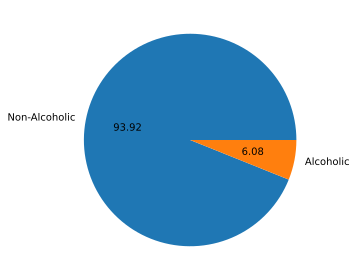

In [20]:
plt.pie(df.HvyAlcoholConsump.value_counts() , labels = ['Non-Alcoholic' , 'Alcoholic'] , autopct='%.2f');

Data (HvyAlcoholConsump) is highly imbalance can't withdraw information from it.

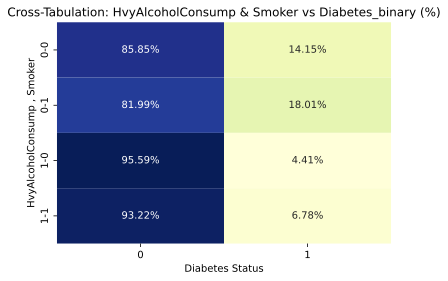

In [21]:
cross_tab = pd.crosstab([df.HvyAlcoholConsump, df.Smoker], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HvyAlcoholConsump , Smoker")
plt.title("Cross-Tabulation: HvyAlcoholConsump & Smoker vs Diabetes_binary (%)")
plt.show()

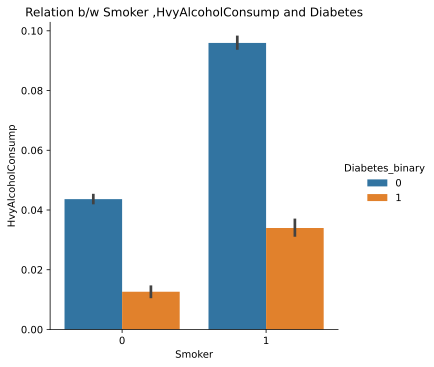

In [22]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df , hue="Diabetes_binary"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes");

**Result : Alcohol consumption with smoking , significantly increase the risk of diabetes**

### HEALTH RELATED FEATURES
**MentHlth,
PhysHlth,
DiffWalk,
Stroke,
HeartDiseaseorAttack,
GenHlth**

#### Relation with Stroke
**Column info :**
****
Stroke : (Ever told) you had a stroke. (0,1)

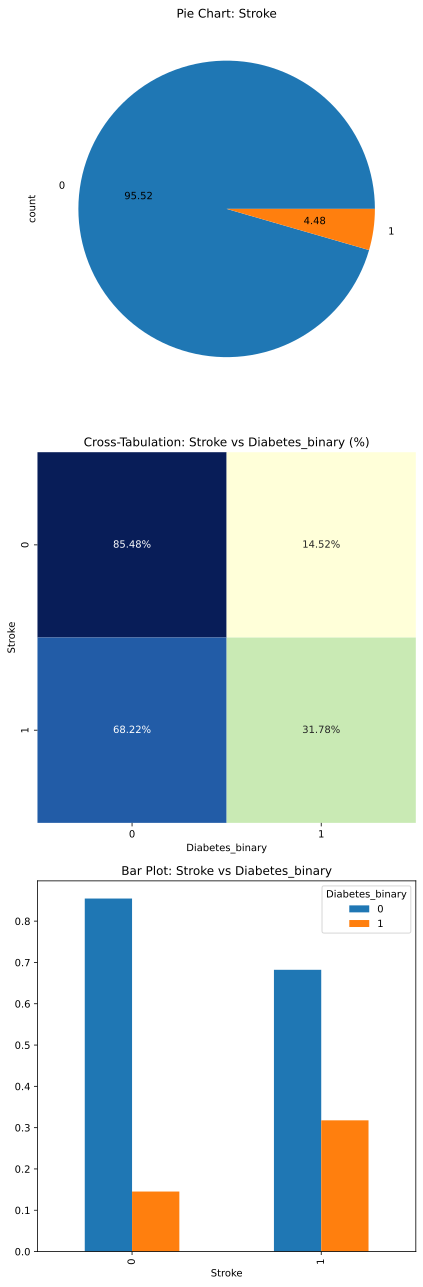

In [23]:
visualize_feature('Stroke' , df)

**Result : Diabetes is a major risk factor for stroke. People with diabetes are twice as likely to have a stroke as people without diabetes. This is because diabetes damages blood vessels, making them more likely to clot and block blood flow to the brain**

#### Relation With HeartDiseaseorAttack
**Column info :**
****
HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

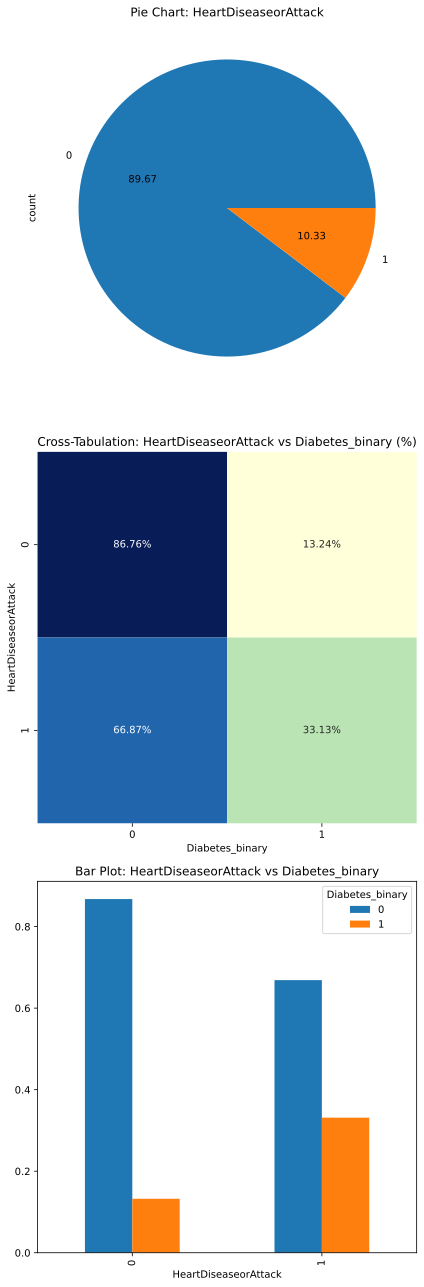

In [24]:
visualize_feature('HeartDiseaseorAttack' , df)

**Result : According to data , Heart disease can also lead to diabetes. People who have had a heart attack or stroke are more likely to develop diabetes later in life**

#### Relation with GenHlth
**Column info :**
****
GenHlth : Would you say that in general your health is: rate (1 ~ 5)

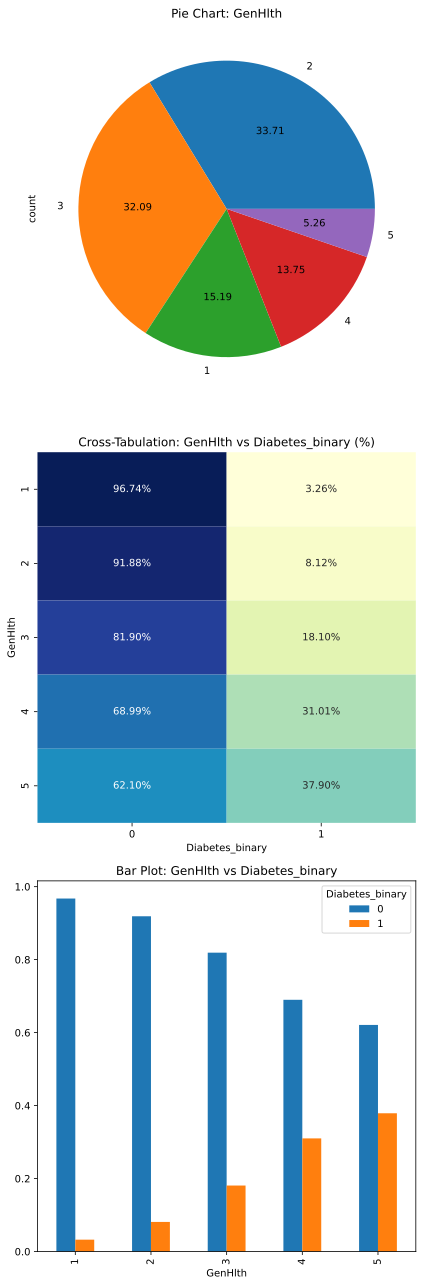

In [25]:
visualize_feature('GenHlth' , df)

**Result : According to data , the general health rating is directly porportional to Diabetes**

#### Relation with MentHlth
****
MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

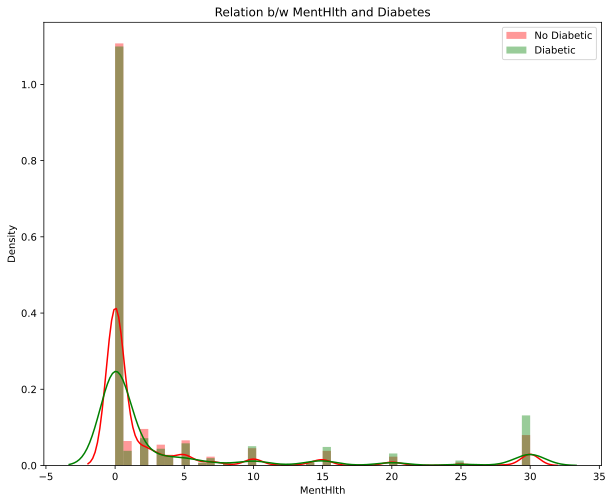

In [26]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.MentHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.MentHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

**Result : People with poor mental health are at increased risk of developing diabetes.
The risk of developing diabetes is even higher for people with poor mental health that lasts for more than 20 days.
This is because poor mental health can lead to unhealthy lifestyle choices, such as overeating, smoking, and physical inactivity.**

#### Relation with PhysHlth
**Column info :**
****
PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

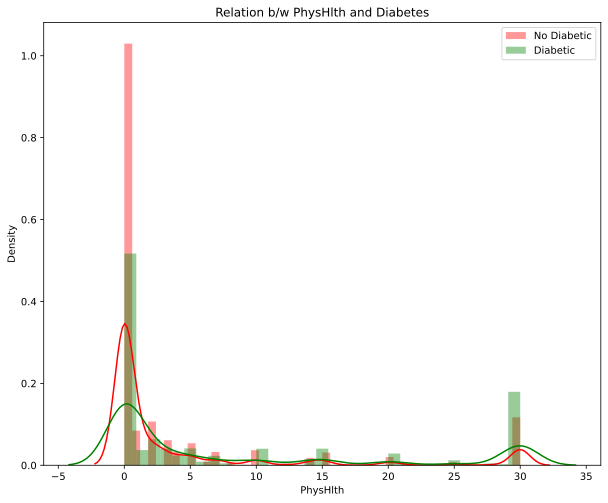

In [27]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.PhysHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.PhysHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w PhysHlth and Diabetes")

plt.legend()

**Result : Couldn't able to withdraw any conclusion.**

#### Relation with DiffWalk
**Column info :**
****
DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

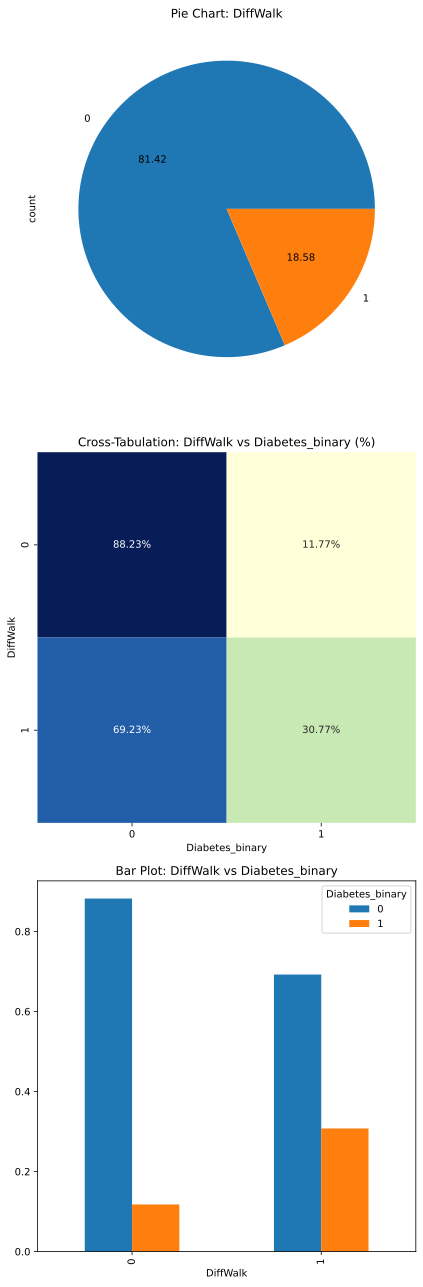

In [28]:
visualize_feature('DiffWalk' , df)

**Result : People with Diabetes have diffulty in walking and climbing stairs or vice versa**

### HEALTHCARE RELATED FEATURES
**AnyHealthcare,
NoDocbcCost**

#### Relation with AnyHealthcare
**Column info :**
****
AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

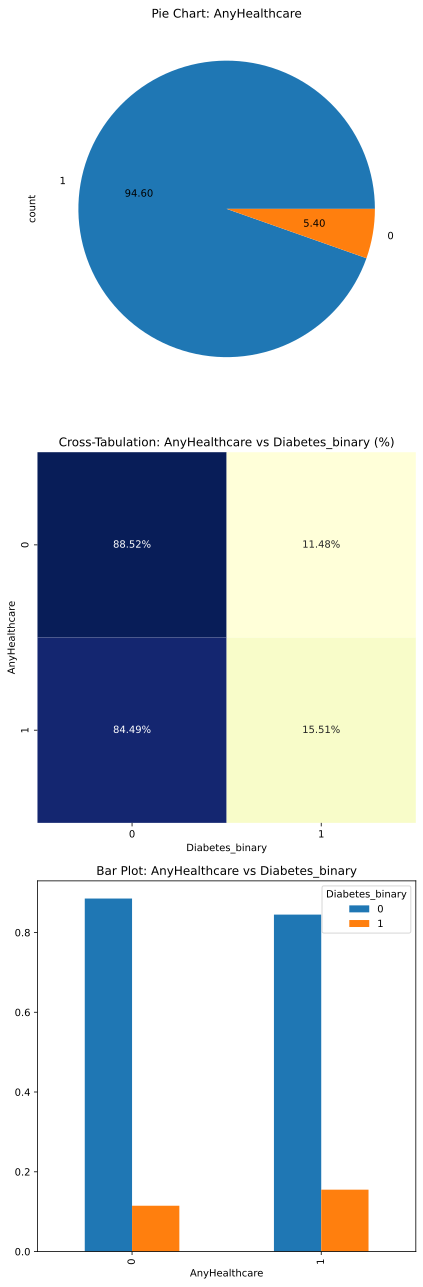

In [29]:
visualize_feature('AnyHealthcare' , df)

In [30]:
df.Diabetes_binary.corr(df.AnyHealthcare)

0.02533133630772532

**Result : AnyHealthcare feature is very slighlty impacting the diabetes feature**

#### Relation with NoDocbcCost
**Column info :**
****
NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

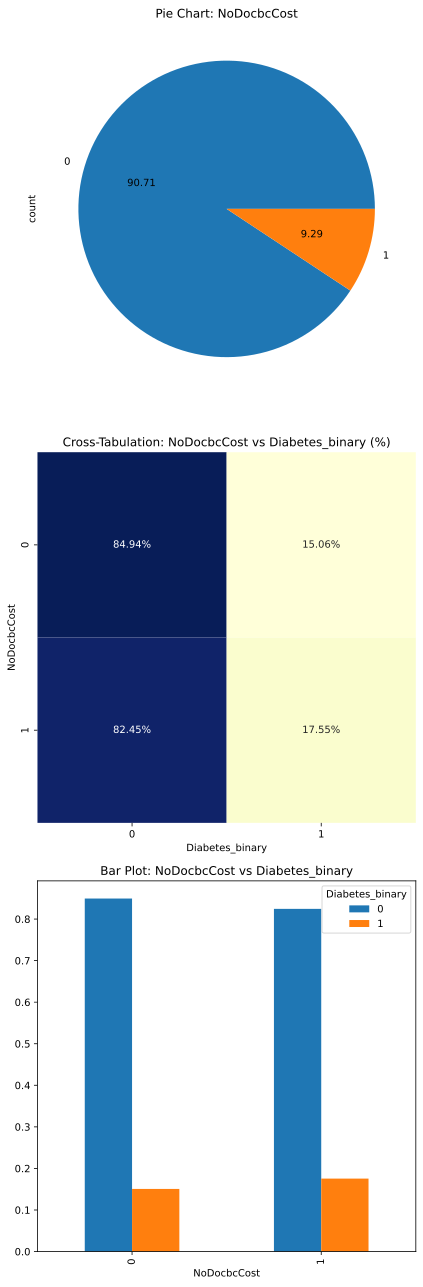

In [31]:
visualize_feature('NoDocbcCost' , df)

**Result : Approximately 10% of people do not seek medical care due to financial constraints, even though they have a slightly higher risk of developing a disease.**

### LIFE STYLE RELATED FEATURES
**PhysActivity ,
Veggies ,
Fruits**

#### Relation with PhysActivity
**Column info :**
****
PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

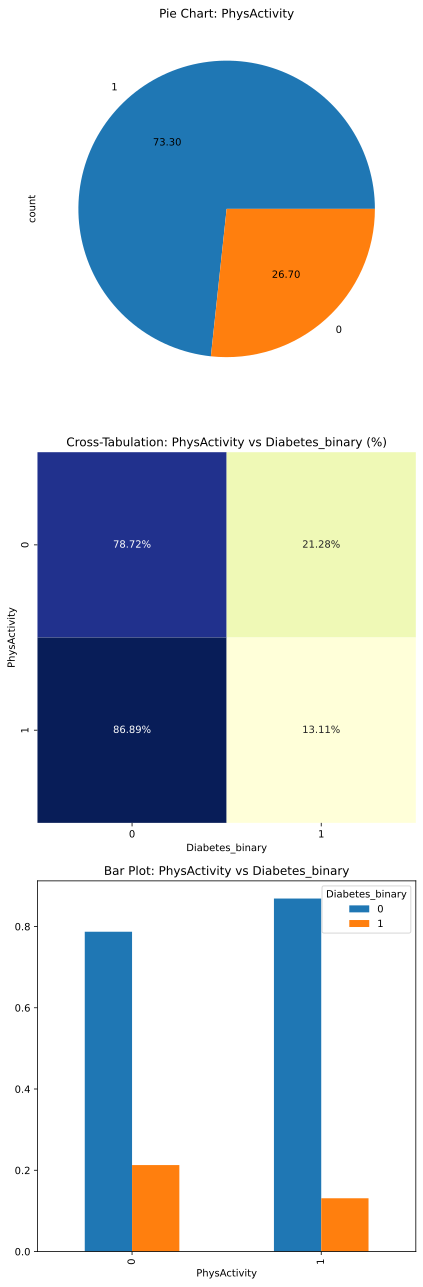

In [32]:
visualize_feature('PhysActivity' , df)

**Result : Regular physical activity is associated with a reduced risk of diabetes.**

#### Relation with Veggies
**Columns info :**
****
Veggies : Consume Vegetables 1 or more times per day (0,1)

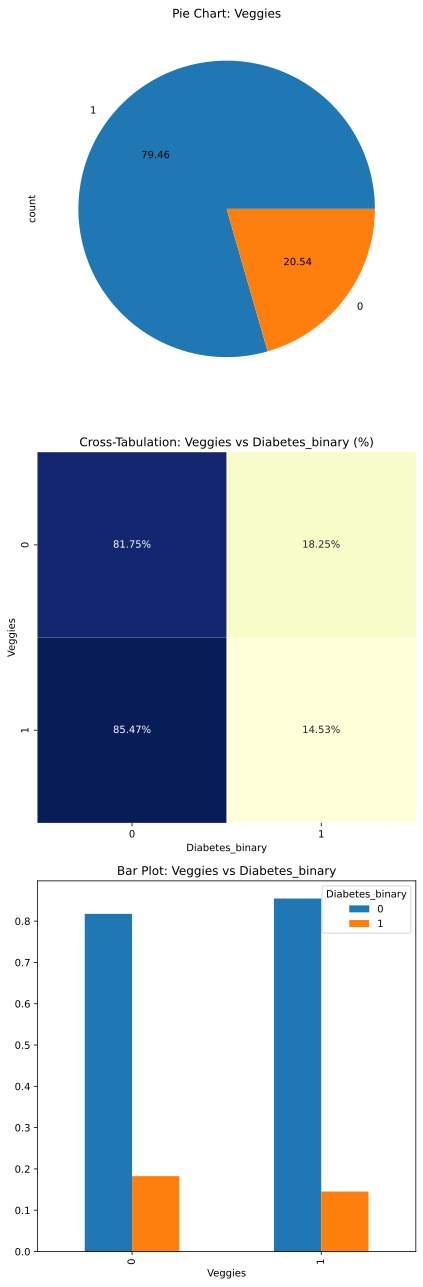

In [33]:
visualize_feature('Veggies' , df)

#### Relation with Fruits
**Column info :**
****
Fruits : Consume Fruit 1 or more times per day (0,1)

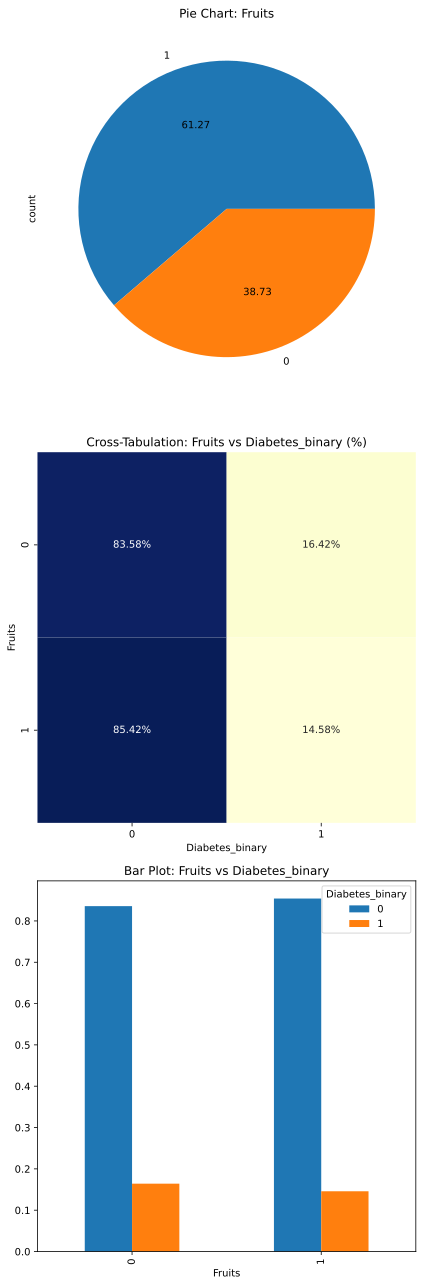

In [34]:
visualize_feature('Fruits' , df)

### SOCIAL FEATURES
**Age ,
Sex , 
Education , 
Income**

#### Relation with Age
**Column info :**
****
Age : Fourteen-level age category (1 ~ 14)

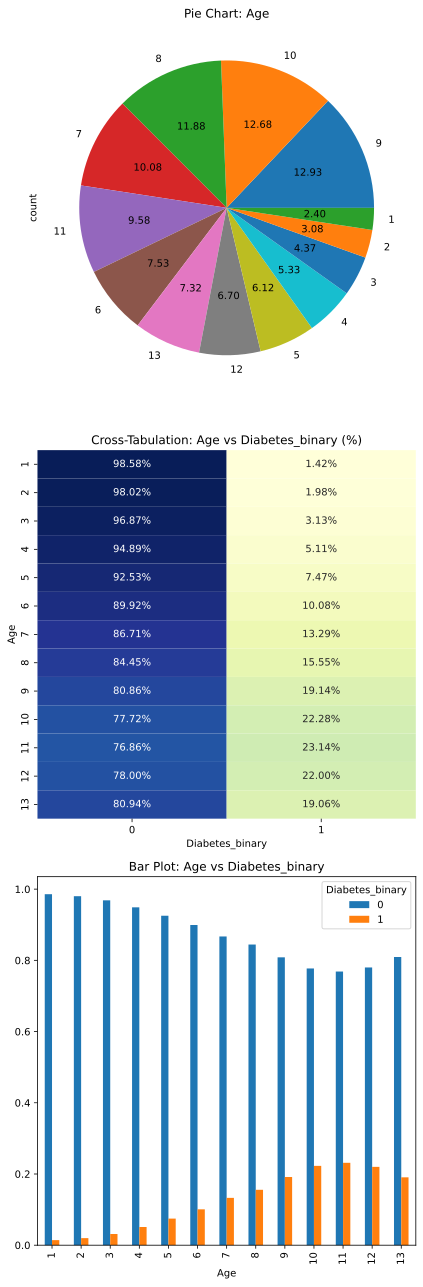

In [35]:
visualize_feature('Age' , df)

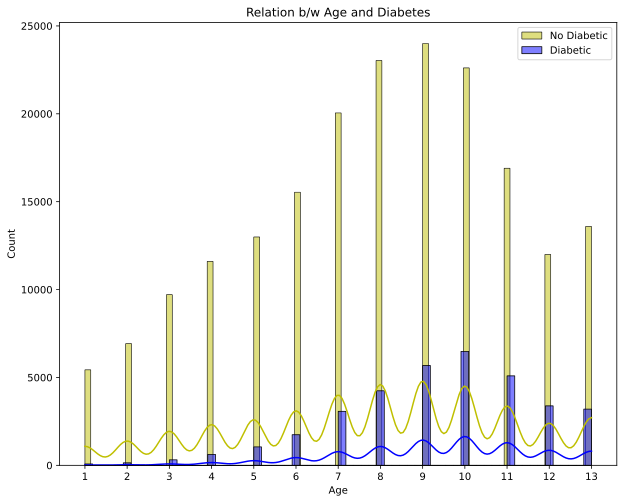

In [36]:
plt.figure(figsize=(10, 8))
sns.histplot(df.Age[df.Diabetes_binary == 0], color="y", label="No Diabetic" , kde = True )
sns.histplot(df.Age[df.Diabetes_binary == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(df["Age"].unique())
plt.legend()

**Result : As Age Increase the risk Diabetes also increase**

#### Relation with Sex
**Column info :**
****
Sex : Indicate sex of respondent (0,1) (Female or Male)

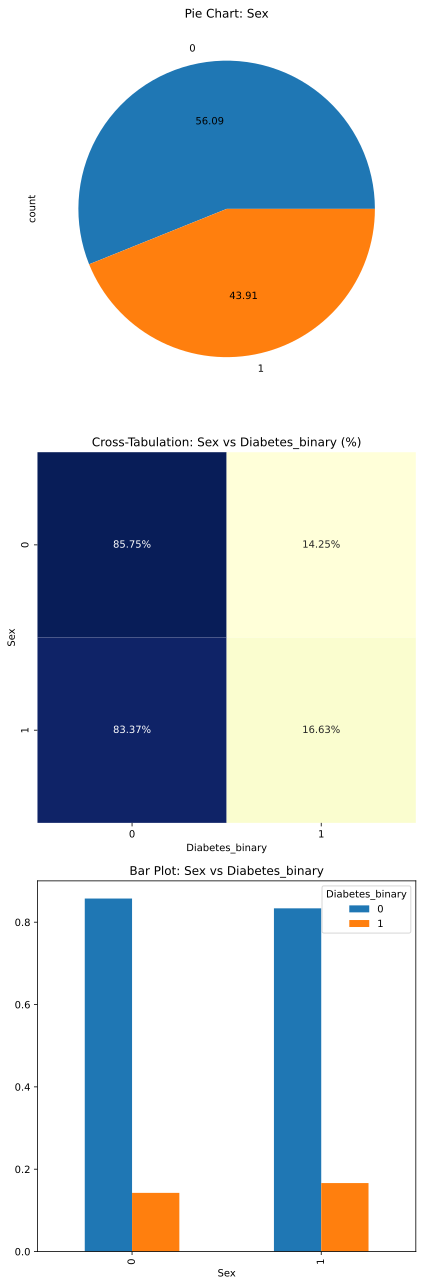

In [37]:
visualize_feature('Sex', df)

#### Relation with Education
**Column info :**
****
Education : What is the highest grade or year of school you completed? (1 ~ 6)

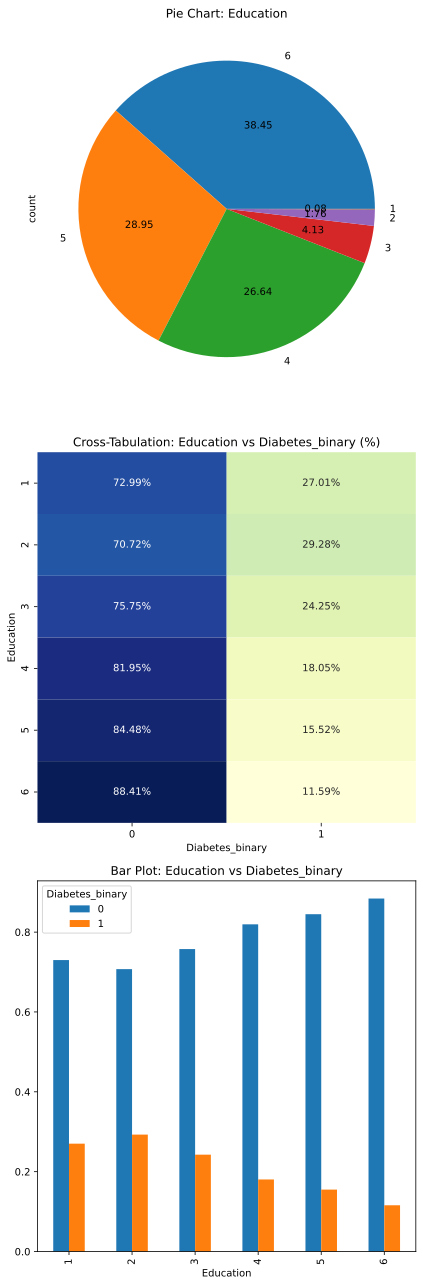

In [38]:
visualize_feature('Education' , df)

#### Relation with Income
**Column info :**
****
Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

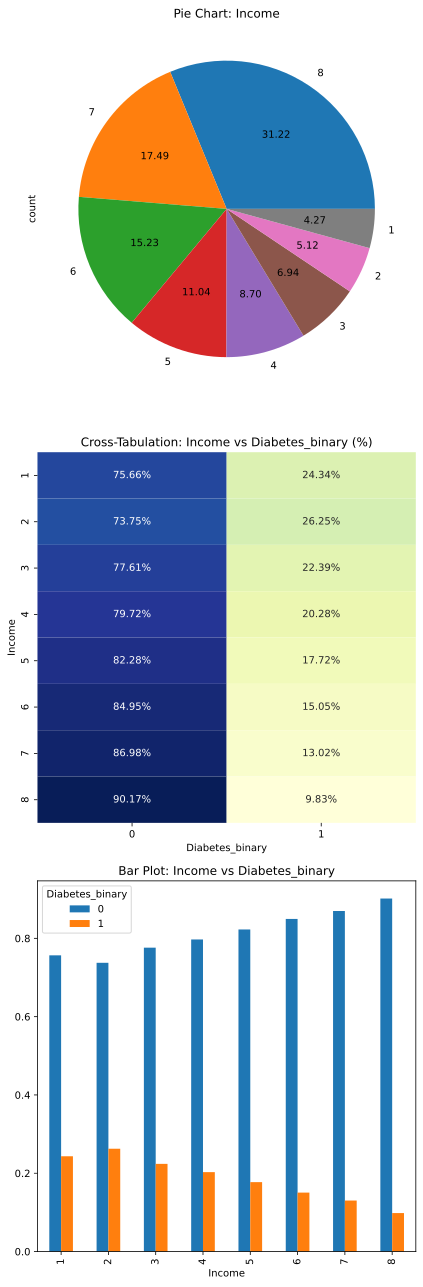

In [39]:
visualize_feature('Income' ,df)

**Result :**

1. male and female are equally vulnerable for Diabetes.

2. people older than 45 are more vulnerable for diabetes then the younger ones.when the age increase the number of diabetic people also increas.

3. when Education is going Higher the number of Diabetic people is dicreasing.

4. people with lower income has more risk of diabetes then the Higher ones.

## Feature Selection

Feature selection is the process of selecting a subset of features from a dataset that are most relevant to the target variable. It is important because it can improve the performance of machine learning models by reducing noise and redundancy in the data.

### Pearson Correlation

The Pearson correlation coefficient measures the linear relationship between two continuous variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation. It assumes that the variables are normally distributed and their relationship is linear.

Pros:

* Widely used and understood in statistics.
* Indicates the strength and direction of linear relationship.
* Values are standardized (-1 to 1), making comparisons easier.
* Useful for identifying potential associations between variables.

Cons:

* Only captures linear relationships; might miss non-linear associations.
* Sensitive to outliers, which can distort results.
* Assumes normal distribution and homoscedasticity.
* Cannot distinguish between causation and correlation.


In [40]:
pearson_correlations = df.drop('Diabetes_binary', axis=1).corrwith(df['Diabetes_binary']).abs()
sorted_correlations = pearson_correlations.sort_values(ascending=False)

sorted_correlations_df = pd.DataFrame({'Column': sorted_correlations.index, 'Correlation': sorted_correlations.values})

sorted_correlations_df

,Column,Correlation
0,GenHlth,0.276940
1,HighBP,0.254318
2,DiffWalk,0.205302
3,BMI,0.205086
4,HighChol,0.194944
5,Age,0.177263
6,HeartDiseaseorAttack,0.168213
7,PhysHlth,0.156211
8,Income,0.140659
9,Education,0.102686


In [41]:
sorted_correlations_df[sorted_correlations_df.Correlation > 0.05]

,Column,Correlation
0,GenHlth,0.276940
1,HighBP,0.254318
2,DiffWalk,0.205302
3,BMI,0.205086
4,HighChol,0.194944
5,Age,0.177263
6,HeartDiseaseorAttack,0.168213
7,PhysHlth,0.156211
8,Income,0.140659
9,Education,0.102686


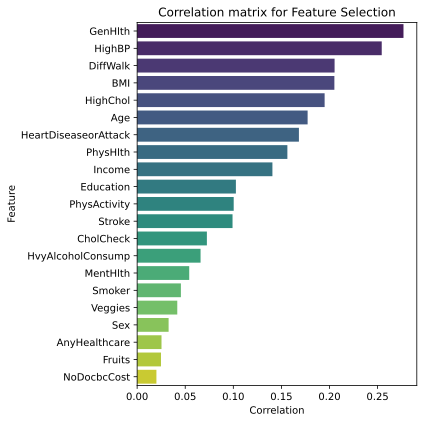

In [42]:
plt.figure(figsize=(6, 6))  
sns.barplot(x='Correlation', y='Column', data=sorted_correlations_df, palette='viridis')

plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation matrix for Feature Selection')

plt.tight_layout()
plt.show()

Pearson correlation coefficients sorted in decreasing order and absolute value.

If we set a threshold of 0.05, Smoker and below features are out.

### Chi-Squared Test
The chi-squared test is a statistical method used to determine the association between two categorical variables. It compares the observed frequencies in a contingency table with the expected frequencies under the assumption of independence between the variables.

Pros:

* Determines if there's a significant association between categorical variables.
* Works well for large datasets.
* Provides a p-value indicating the strength of evidence against the null hypothesis.
* Applicable to various research fields, from social sciences to genetics.

Cons:

* Assumes that observed frequencies are independent and identically distributed.
* Not suitable for small sample sizes or when expected frequencies are too low.
* Limited to assessing association, not causation.
* Doesn't quantify the strength or direction of the association, only its presence.

In [43]:
from sklearn.feature_selection import chi2

df_X = df.drop('Diabetes_binary', axis=1)
df_y = df['Diabetes_binary']

f_score, p_value = chi2(df_X, df_y)

chisquare_results = pd.DataFrame({'Feature': df_X.columns, 'ChiSqr_Score': f_score, 'ChiSqr_pValue': p_value})

chi2_list = chisquare_results.sort_values(by='ChiSqr_Score', ascending=False)

chi2_list

,Feature,ChiSqr_Score,ChiSqr_pValue
15,PhysHlth,97988.761672,0.000000e+00
3,BMI,15507.736174,0.000000e+00
14,MentHlth,11419.584750,0.000000e+00
18,Age,8539.906340,0.000000e+00
0,HighBP,8098.548237,0.000000e+00
16,DiffWalk,7875.496177,0.000000e+00
13,GenHlth,7671.732832,0.000000e+00
6,HeartDiseaseorAttack,5822.145697,0.000000e+00
1,HighChol,4869.312739,0.000000e+00
20,Income,3377.099257,0.000000e+00


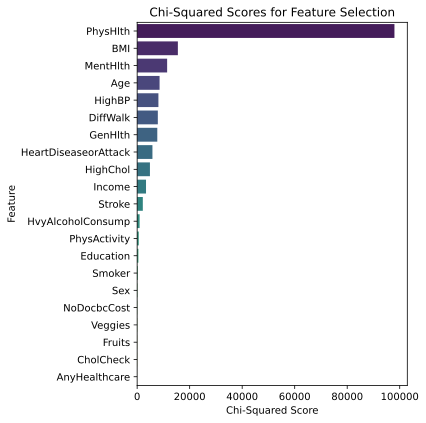

In [44]:
plt.figure(figsize=(6, 6))  
sns.barplot(x='ChiSqr_Score', y='Feature', data=chi2_list, palette='viridis')

plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature')
plt.title('Chi-Squared Scores for Feature Selection')

plt.tight_layout()
plt.show()

These findings highlight key factors contributing to diabetes and underscore the importance of managing lifestyle, health habits, and socioeconomic factors to reduce the risk of diabetes.

### VIF Test

The Variance Inflation Factor (VIF) test is used to assess multicollinearity in regression analysis. It quantifies how much the variance of the estimated regression coefficient is inflated due to collinearity among predictor variables. High VIF values indicate strong multicollinearity.

Pros:

* Helps identify multicollinearity, where predictor variables are highly correlated.
* Guides feature selection by identifying variables that contribute most to multicollinearity.
* Allows improving model stability and interpretability.
* Useful in managing model complexity by removing redundant variables.

Cons:

* Assumes a linear relationship between variables.
* May not detect non-linear or complex multicollinearity.
* High VIF values don't suggest causation; they indicate correlation.
* Doesn't handle multicollinearity's effects on the validity of coefficients well.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
20,Education,27.104386
3,CholCheck,21.462549
12,AnyHealthcare,18.935499
4,BMI,17.538331
21,Income,12.601485
14,GenHlth,11.069198
19,Age,9.769808
10,Veggies,5.280736
8,PhysActivity,4.138119
9,Fruits,2.825768


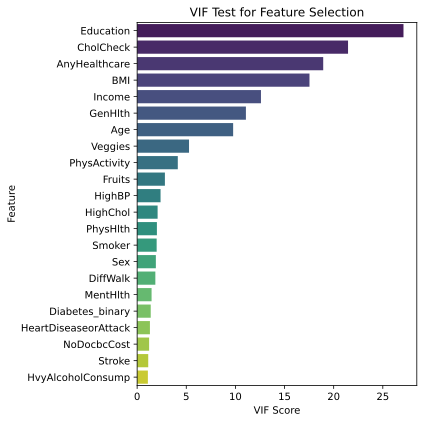

In [46]:
vif_data = vif_data.sort_values(by='VIF', ascending=False)
plt.figure(figsize=(6, 6))  
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')

plt.xlabel('VIF Score')
plt.ylabel('Feature')
plt.title('VIF Test for Feature Selection')

plt.tight_layout()
plt.show()

### ANOVA Test

The Analysis of Variance (ANOVA) test is used to compare means across multiple groups to determine if there are statistically significant differences among them. It assesses whether the variation in data is due to differences between groups or random variability.

Pros:

* Detects differences between multiple groups simultaneously.
* Provides information on whether group means are significantly different.
* Offers insights into the effects of categorical variables on a continuous outcome.
* Can handle various group sizes and unequal variances.

Cons:

* Assumes independence and normal distribution of residuals.
* Doesn't identify which specific groups differ; it only indicates the presence of a difference.
* Sensitive to outliers, especially with small sample sizes.
* Requires post hoc tests for pairwise comparisons when more than two groups exist.

In [47]:
import scipy.stats as stats
import pandas as pd

categorical_features = df.drop('Diabetes_binary', axis=1)

anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-value', 'Result'])
alpha = 0.05

for feature in categorical_features:
    group_data = [df[df[feature] == group]['Diabetes_binary'] for group in df[feature].unique()]
    f_statistic, p_value = stats.f_oneway(*group_data)
    result = 'Reject H0' if p_value < alpha else 'Fail to reject H0'
    
    new_row = pd.DataFrame({'Feature': [feature], 'F-Statistic': [f_statistic], 'P-value': [p_value], 'Result': [result]})
    anova_results = pd.concat([anova_results, new_row], ignore_index=True)

anova_results

,Feature,F-Statistic,P-value,Result
0,HighBP,15868.017696,0.000000e+00,Reject H0
1,HighChol,9065.177413,0.000000e+00,Reject H0
2,CholCheck,1213.321927,3.848806e-265,Reject H0
3,BMI,152.800282,0.000000e+00,Reject H0
4,Smoker,476.133601,1.899484e-105,Reject H0
5,Stroke,2280.282576,0.000000e+00,Reject H0
6,HeartDiseaseorAttack,6682.140008,0.000000e+00,Reject H0
7,PhysActivity,2336.872150,0.000000e+00,Reject H0
8,Fruits,141.282132,1.426999e-32,Reject H0
9,Veggies,400.370333,5.450689e-89,Reject H0


ANOVA statistic results show that the probability distribution of the variances are not equal for these features in the diabetic and non-diabetic groups.

### Mutual Information

Mutual Information (MI) is a measure of the mutual dependence between two variables. It quantifies the amount of information that knowing one variable provides about the other. In feature selection, MI is used to assess the relevance of a feature to the target variable.

Pros:

* Measures non-linear relationships between variables.
* Useful for both continuous and categorical variables.
* Provides a holistic view of feature relevance.
* Can capture complex dependencies and interactions.

Cons:

* Sensitive to the scale of measurement (may need normalization).
* May not handle high-dimensional data well.
* Prone to overestimating relevance for noisy or irrelevant features.
* Requires binning or discretization for continuous variables.

In [48]:
from sklearn.feature_selection import mutual_info_classif

df_X = df.drop('Diabetes_binary', axis=1)
df_y = df['Diabetes_binary']

mi_scores = mutual_info_classif(df_X, df_y)

mi_results = pd.DataFrame({'Feature': df_X.columns, 'MI_Score': mi_scores})

mi_results_sorted = mi_results.sort_values(by='MI_Score', ascending=False)

mi_results_sorted

,Feature,MI_Score
13,GenHlth,0.048744
2,CholCheck,0.046538
0,HighBP,0.046243
11,AnyHealthcare,0.039166
7,PhysActivity,0.036281
9,Veggies,0.035760
3,BMI,0.033461
1,HighChol,0.033439
18,Age,0.030319
8,Fruits,0.027248


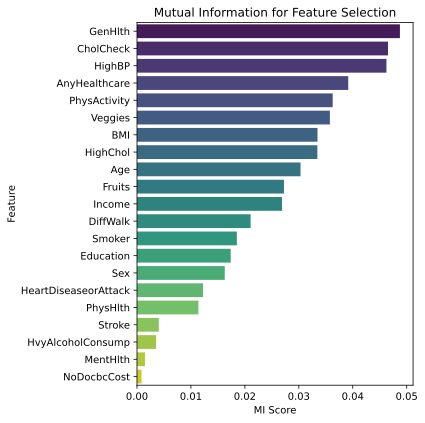

In [49]:
plt.figure(figsize=(6, 6))  
sns.barplot(x='MI_Score', y='Feature', data=mi_results_sorted, palette='viridis')

plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.title('Mutual Information for Feature Selection')

plt.tight_layout()
plt.show()

The MI scores for the features CholCheck and AnyHealthCare are relatively high. However, these features are not directly correlated with the cause of diabetes. CholCheck measures the frequency of cholesterol checks, and AnyHealthCare is a measure of overall health care utilization. While diabetic individuals may tend to get their cholesterol checked more often and use health care more frequently than non-diabetic individuals, these factors do not necessarily cause diabetes.

### F-regression Test (F-Test)

The F-Regression test, commonly known as the F-Test, is used to assess the overall significance of a linear regression model. It compares the fit of a model with certain predictor variables against a reduced model with no predictors. It helps determine if the predictors collectively contribute significantly to explaining the variation in the target variable.

Pros:

* Assesses the overall fit of a linear regression model.
* Helps identify whether at least one predictor variable significantly contributes to the model.
* Useful for variable selection and model simplification.
* Provides insights into the model's explanatory power.

Cons:

* Assumes that the model assumptions are met (linearity, independence, normality of residuals).
* Doesn't identify which specific predictor variables are significant.
* Can't establish causation, only association.
* Sensitive to outliers and non-normality.

In [50]:
from sklearn.feature_selection import f_regression

f_scores, p_values = f_regression(df_X, df_y)

f_regression_results = pd.DataFrame({'Feature': df_X.columns, 'F-Score': f_scores, 'P-value': p_values})

f_regression_results_sorted = f_regression_results.sort_values(by='F-Score', ascending=False)

f_regression_results_sorted

,Feature,F-Score,P-value
13,GenHlth,19061.436601,0.000000e+00
0,HighBP,15868.017696,0.000000e+00
16,DiffWalk,10097.616798,0.000000e+00
3,BMI,10075.425186,0.000000e+00
1,HighChol,9065.177413,0.000000e+00
18,Age,7444.458687,0.000000e+00
6,HeartDiseaseorAttack,6682.140008,0.000000e+00
15,PhysHlth,5739.591424,0.000000e+00
20,Income,4631.714144,0.000000e+00
19,Education,2445.440895,0.000000e+00


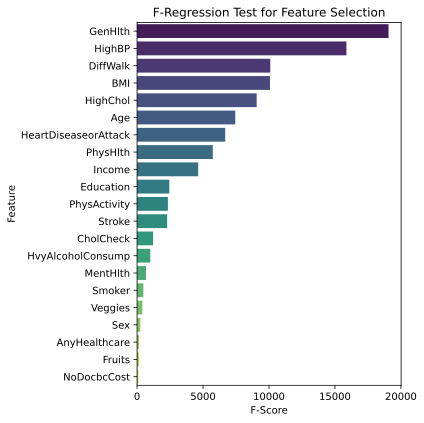

In [51]:
plt.figure(figsize=(6, 6))  
sns.barplot(x='F-Score', y='Feature', data=f_regression_results_sorted, palette='viridis')

plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.title('F-Regression Test for Feature Selection')

plt.tight_layout()
plt.show()

While the provided scoring function is designed for regression tasks, it's important to note that we're dealing with a classification problem in this case. It's not suitable to employ this function for classification purposes. However, for educational purposes, we can still examine its mechanics.

### Information Value and Weight of Evidence

Information Value (IV) and Weight of Evidence (WoE) are statistical concepts used in credit risk modeling and predictive analytics. WoE quantifies the relationship between a categorical variable and the likelihood of an event, such as defaulting on a loan. IV measures the predictive power of a set of predictor variables.

Pros:

* WoE:

    * Helps transform categorical variables into a more informative numerical format.
    * Handles missing values and outliers effectively.
    * Supports direct comparison of the impact of categories on the event.
    * Works well with logistic regression and other predictive models.

* IV:

    * Offers a quantitative way to assess the predictive power of features.
    * Identifies variables that contribute significantly to the target variable.
    * Helps in variable selection and identifying relationships.

Cons:

* WoE:

    * May not perform well in complex non-linear relationships.
    * Requires careful handling of rare categories.
    * Assumes monotonic relationship between WoE and odds.

* IV:

    * Sensitive to the number of categories in a feature.
    * Can be affected by data imbalance.
    * Doesn't provide insights into the direction or magnitude of the relationship.

****
Where the IV score means:

* Less than 0.02 Not useful for prediction
* 0.02 to 0.1 Weak predictive Power
* 0.1 to 0.3 Medium predictive Power
* 0.3 to 0.5 Strong predictive Power
* 0.5 and higher Suspicious Predictive Power

In [52]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [53]:
iv,woe = iv_woe(df, 'Diabetes_binary')

Information value of HighBP is 0.532771
Information value of HighChol is 0.298296
Information value of CholCheck is 0.077694
Information value of BMI is 0.391081
Information value of Smoker is 0.015939
Information value of Stroke is 0.057511
Information value of HeartDiseaseorAttack is 0.16753
Information value of PhysActivity is 0.071942
Information value of Fruits is 0.004702
Information value of Veggies is 0.012756
Information value of HvyAlcoholConsump is 0.047814
Information value of AnyHealthcare is 0.005533
Information value of NoDocbcCost is 0.00295
Information value of GenHlth is 0.648408
Information value of MentHlth is 0.024899
Information value of PhysHlth is 0.161874
Information value of DiffWalk is 0.267031
Information value of Sex is 0.008216
Information value of Age is 0.368591
Information value of Education is 0.079076
Information value of Income is 0.151785


In [54]:
sorted_iv = iv.sort_values(by='IV', ascending=False).reset_index(drop=True)
sorted_iv

,Variable,IV
0,GenHlth,0.648408
1,HighBP,0.532771
2,BMI,0.391081
3,Age,0.368591
4,HighChol,0.298296
5,DiffWalk,0.267031
6,HeartDiseaseorAttack,0.167530
7,PhysHlth,0.161874
8,Income,0.151785
9,Education,0.079076


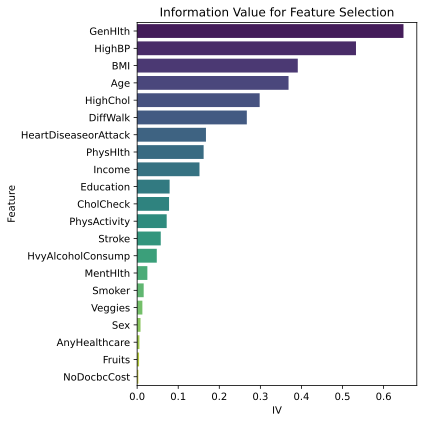

In [55]:
plt.figure(figsize=(6, 6))  
sns.barplot(x='IV', y='Variable', data=sorted_iv, palette='viridis')

plt.xlabel('IV')
plt.ylabel('Feature')
plt.title('Information Value for Feature Selection')

plt.tight_layout()
plt.show()

### RFE

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning. It involves iteratively training a model and removing the least important features based on their impact on model performance, usually in terms of predictive accuracy or another chosen metric.

Pros:

* Helps improve model efficiency by focusing on the most relevant features.
* Automates feature selection by iteratively evaluating feature importance.
* Reduces overfitting by removing noisy or irrelevant features.
* Compatible with a wide range of machine learning algorithms.

Cons:

* Time-consuming for large datasets or complex models.
* Model choice may affect results; performance metric matters.
* Assumes linearity and lacks consideration for feature interactions.
* May not work well with highly correlated features.


In [56]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

n_features_to_select = 13

rf_classifier = RandomForestClassifier(random_state=42)

rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=n_features_to_select)
rfe_selector = rfe_selector.fit(X_train, y_train)

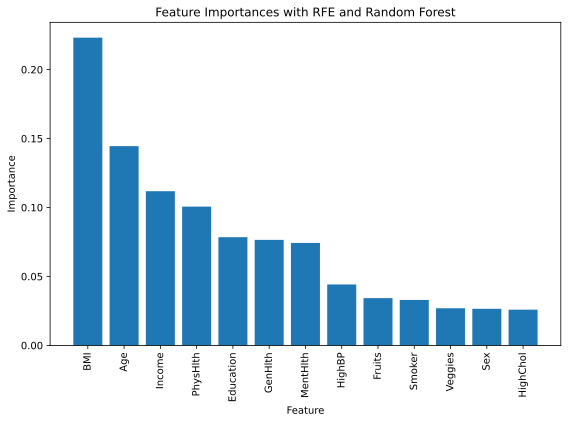

In [57]:
selected_features = X_train.columns[rfe_selector.support_]

feature_importances = rfe_selector.estimator_.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

sorted_features = selected_features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances with RFE and Random Forest")
plt.tight_layout()
plt.show()

**Upcoming Work**
* [x] Diabetes data analysis
* [ ] Diabetes prediction using ensemble learning
* [ ] Building a streamlit app for it